### Exploratory Data Analysis Gapminder
Regression problem with `life` the target variable.

In [1]:
import os
import pandas  as pd
import seaborn as sns
from pathlib   import Path
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# set root directory
path_root = Path("C:/Users/giann/data-science-core")
os.chdir(path_root)
print(f'- Root directory = {os.getcwd()}')

- Root directory = C:\Users\giann\data-science-core


In [8]:
# import dataset
path_dataset = path_root / 'dataset/gm_2008_region.csv'
data  = pd.read_csv(path_dataset)

### DataFrame Analysis

In [22]:
data.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


In [17]:
data.describe(percentiles = [0.5], include = 'all') # include information about category

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122,NaN
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667,NaN
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000,NaN
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000,NaN
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000,NaN


- Use `data.head().transpose()` and `data.describe(include = 'all').tranpose()` if there are many columns.
- `include = 'all'` include categorical information. In this case there are 139 observation, and the most frequent category is `Europe & Central Asia` which appear 41 times.

### Correlation analysis
Note: `heatmap` does not show categorical variables, in this case `Region`

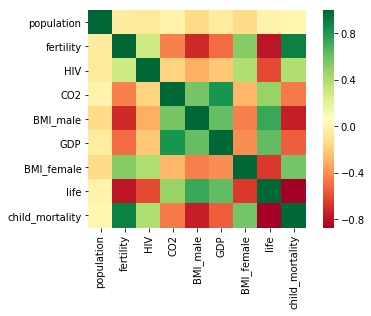

In [10]:
sns.heatmap(data.corr(), square = True, cmap = 'RdYlGn')
plt.show()

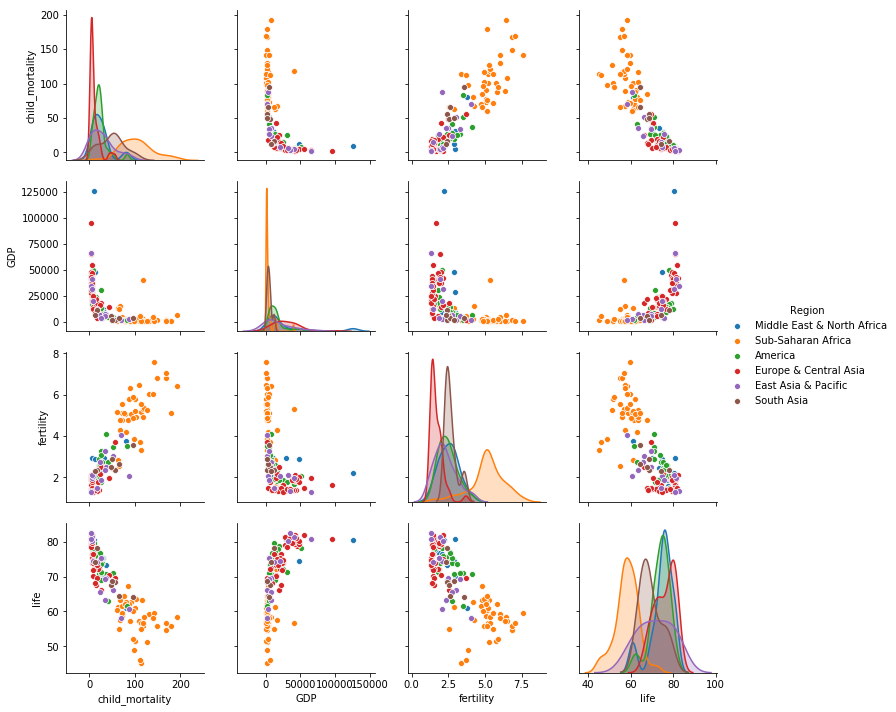

In [31]:
# pairplot plot only numerical values
subset_col = ['child_mortality', 'GDP', 'fertility', 'Region', 'life']
sns.pairplot(data[subset_col], hue = 'Region')
plt.show()

We can observe that there is a substatial negative correlation between `life` and `fertility`. <br>
Since `GDP` is highly **skewed** let's double check if the `child_mortality` of a `Region` correlates with the `GDP`. To check this, let us take **log** of the `GDP` and draw a scatter plot against `child_mortality`.

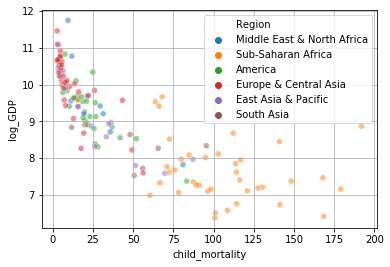

In [36]:
# Create a new logged population column 
data['log_GDP'] = np.log(data['GDP'])
# Draw a scatterplot of log-population to # of items sold
sns.scatterplot(x = 'child_mortality', 
                y = 'log_GDP', 
                # Reduce point opacity to show overlap
                alpha = 0.5,
                hue = 'Region',
                data = data)
plt.grid()
plt.show()

### Linear regression Analysis

In [64]:
# variable which we want to perfomr analysis
x_var = 'child_mortality'
y_var = 'life'

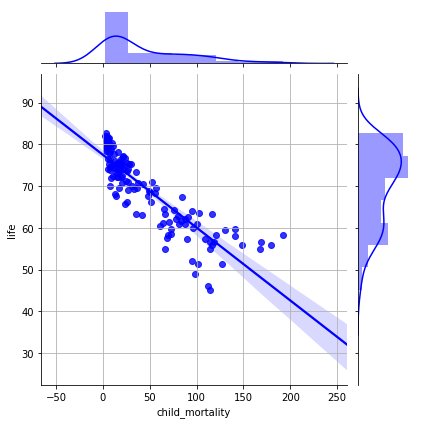

In [65]:
sns.jointplot(x = x_var, y = y_var, data = data, kind = 'reg', color = 'b')
plt.grid()
plt.show()

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

In [66]:
print(f" o pearson corr = {pearsonr(data[x_var], data[y_var])[0]}")
print(f" o p-value = {pearsonr(data[x_var], data[y_var])[1]}")

 o pearson corr = -0.8741061295399251
 o p-value = 8.452380463280616e-45


In [72]:
# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(x = data[x_var], y = data[y_var], deg = 1)
# Print the results to the screen
print('o slope =', round(a, 2), 'year life expentancy / child mortality')
print('o intercept =', round(b, 2), 'year of life expentancy')

o slope = -0.17 year life expentancy / child mortality
o intercept = 77.47 year of life expentancy


### Analysis of categorical features
Assessment of any predictive capability from categorical data.

In [7]:
data.describe(exclude = 'number')

,Region
count,139
unique,6
top,Europe & Central Asia
freq,41


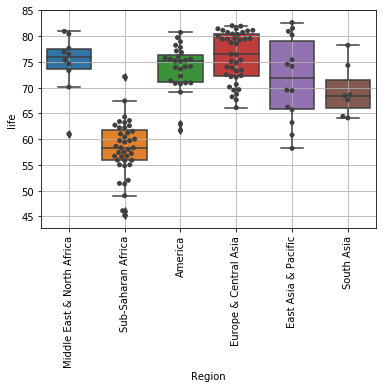

In [30]:
ax = sns.boxplot(x = 'Region', y = 'life', data = data)
ax = sns.swarmplot(x = 'Region', y = 'life', data = data, color = '.25')
plt.xticks(rotation = 90)
plt.grid()

Results shows that the categorical feature `Region` might potentially have a predictive power for `life` targer variable

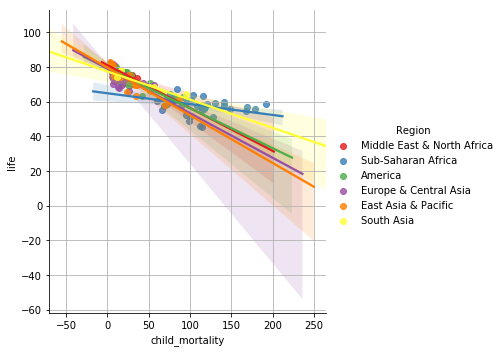

In [10]:
sns.lmplot(x = 'child_mortality', y = 'life', data = data, hue = 'Region', palette='Set1')
plt.grid()
plt.show()

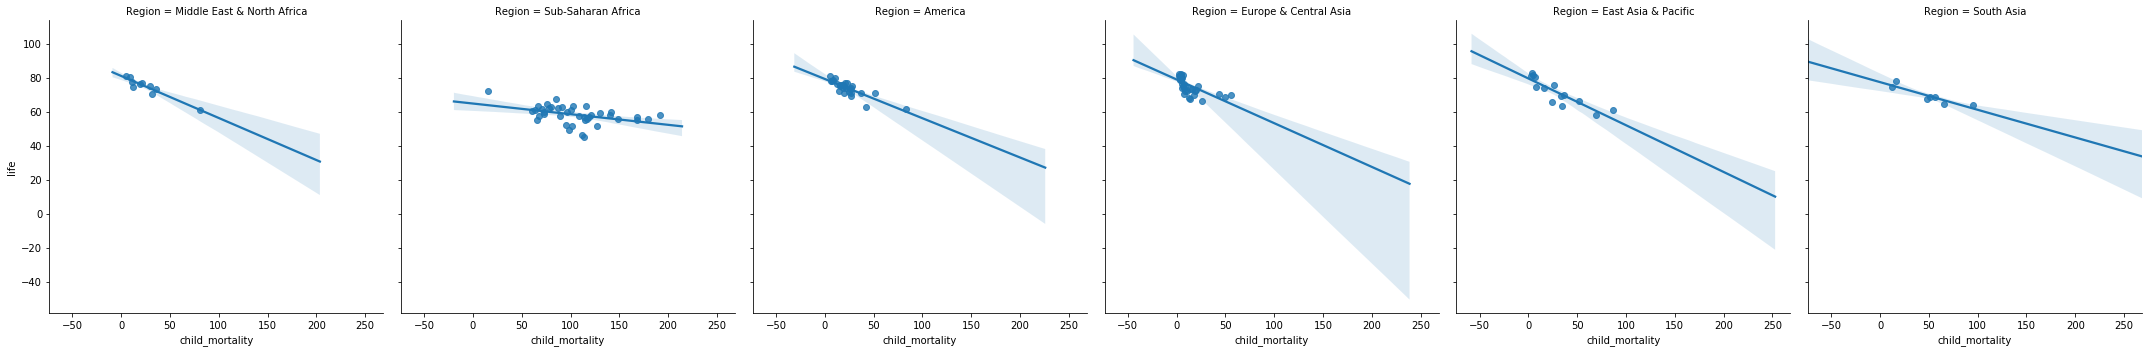

In [13]:
# equivalent plot of above
sns.lmplot(x = 'child_mortality', y = 'life', data = data, col = 'Region', palette='Set1')
plt.show()

### Residual analysis

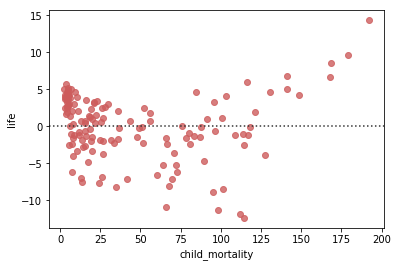

In [20]:
sns.residplot(x = 'child_mortality', y = 'life', data = data, color='indianred')
plt.show()

### Empirical cumulative distribution function (ECDF)
Another way to show how the data are distributed

In [41]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n
    return x, y

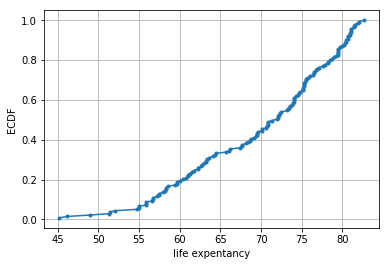

In [28]:
# Compute ECDF for the total life expentancy
x_life, y_life = ecdf(data['life'])
# Generate plot
plt.plot(x_life, y_life, marker = '.', linestyle = '-')
plt.ylabel('ECDF')
plt.xlabel('life expentancy')
plt.grid()
plt.show()

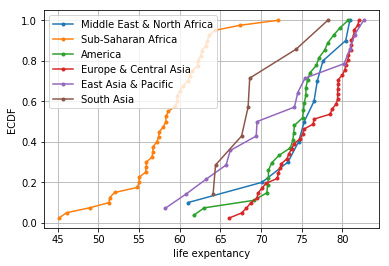

In [33]:
# Compute ECDF per Region
for Region in data['Region'].unique() :
    # Compute ECDF for the total life expentancy
    x_life, y_life = ecdf(data.loc[data['Region'] == Region ,'life'])
    # Generate plot
    plt.plot(x_life, y_life, marker = '.', linestyle = '-', label = Region)

plt.legend(loc = 'upper left')
plt.ylabel('ECDF')
plt.xlabel('life expentancy')
plt.grid()
plt.show() 

Also here appear a substancial difference in term of life expectancy w.r.t. region. Let's focus on some percentile

In [39]:
# get quantile
q25, median, q75 = np.percentile(data.loc[data['Region'] == 'Sub-Saharan Africa' ,'life'] , [25, 50, 75])
print(f"25% quantile = {q25} | 50% quantile = {median} | 75% quantile = {q75}")

25% quantile = 55.875 | 50% quantile = 58.3 | 75% quantile = 61.675


## Statistical Inference
- draw probabilistic conclusions about what we might expect if we collected the same data over and over again.
- To draw more general conclusions from relatively few data or observations.
- Data are almost never exactly the same when acquired again, and probability allows us to say how much we expect them to vary.
- we use **bootstraping** i.e. a simulated replica of the actual experiment obtained **resampling the data with replament**.

### Check normality of Life Expectancy
Note that the estimated parameter are optimal for the model we choose for our data! 

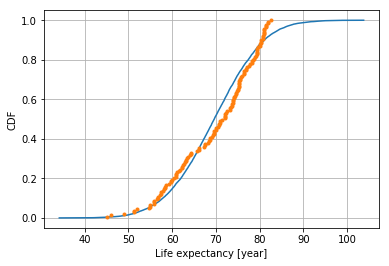

In [73]:
# Compute mean and standard deviation from data: mu, sigma
mu    = np.mean(data[y_var])
sigma = np.std(data[y_var])

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(data[y_var])

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Life expectancy [year]')
_ = plt.ylabel('CDF')
plt.grid()
plt.show()

### Bootstrap ECDF
Bootstrap samples give an idea of how the distribution of `life expectancy` is spread.

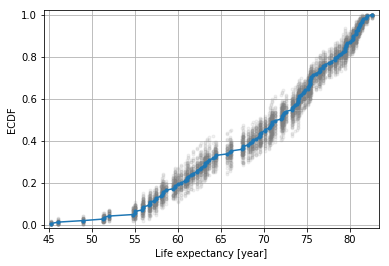

In [77]:
for i in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(data[y_var], size=len(data[y_var]))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(data[y_var])
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('Life expectancy [year]')
_ = plt.ylabel('ECDF')
plt.grid()
plt.show()

### Boostraap mean 

In [103]:
## define function which generate many bootstrap replicates
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(data[y_var], np.mean, size = 10000)

**Standard Error of the Mean (SEM)**: The standard error of the mean is the standard deviation of the sampling distribution of the mean. The formula $\sigma_{\mu} = \frac{\sigma}{\sqrt(N)}$ where $\sigma$ is the standard deviation of the original distribution and $N$ is the sample size (the number of scores each mean is based upon). This formula does not assume a normal distribution. However, many of the uses of the formula do assume a normal distribution. 

In [83]:
# Compute and print  SEM
sem = np.std(data[y_var]) / np.sqrt(len(data[y_var]))
print(f"o standard error of the mean = {round(sem, 2)}")
# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(f"o standard deviation of bootstrap replicates = {round(bs_std, 2)}")

o standard error of the mean = 0.77
o standard deviation of bootstrap replicates = 0.78


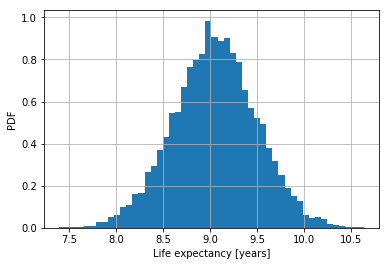

In [118]:
# Make a histogram of the results
_ = plt.hist(bs_replicates, bins = 50, density = True)
_ = plt.xlabel('Life expectancy [years]')
_ = plt.ylabel('PDF')
plt.grid()
plt.show()

Notice that the **SEM** got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

### Compute 95% confidence interval
A confidence interval gives upper and lower bounds on the range of parameter values you might expect to get if we repeat our measurements. Bootstrap method is that you can take percentiles of your bootstrap replicates to get your confidence interval.

In [119]:
[q25, q97] = np.percentile(bs_replicates, [2.5, 97.5])
print(f"o 95% confidence interval of the mean is = [{round(q25, 2)}, {round(q97, 2)}] years")

o 95% confidence interval of the mean is = [8.15, 9.91] years


### Bootstrap variance

o 95% confidence interval of the std is = [8.15, 9.91] years


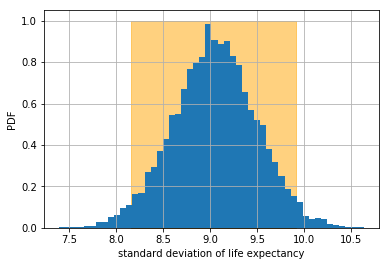

In [116]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(data[y_var], np.std, 10000)

[q25, q97] = np.percentile(bs_replicates, [2.5, 97.5])
print(f"o 95% confidence interval of the std is = [{round(q25, 2)}, {round(q97, 2)}] years")

# Make a histogram of the results
_ = plt.hist(bs_replicates, density = True, bins = 50)
_ = plt.xlabel('standard deviation of life expectancy')
_ = plt.ylabel('PDF')
_ = plt.fill_between([q25, q97], [1, 1], color = 'orange', alpha = 0.5)
plt.grid()
plt.show()

The mean and variance are not very Normal since both have a fat tail on the right.